# Bayesian Estimation of a Biased Coin

What are we up to?

## Preliminaries:  Tossing a Coin

Model of a coin toss.  Limitations.

Python setup.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
heads = 0.73

In [17]:
samples = 100
tosses = np.random.uniform (0.0, 1.0, samples) < heads
print ('{0:d} tosses, {1:d} heads, {2:.1f}%'.format (
    samples,
    sum (tosses),
    100 * sum (tosses) / samples))

100 tosses, 70 heads, 70.0%


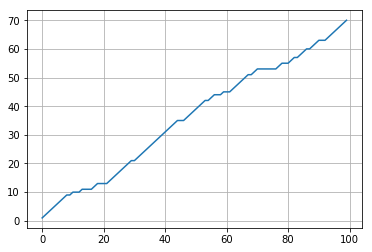

In [19]:
plt.plot (np.cumsum (tosses))
plt.grid ()
# plt.lines ((0, 0), (tosses, tosses))
plt.show ()

## Modeling Theta

The prior

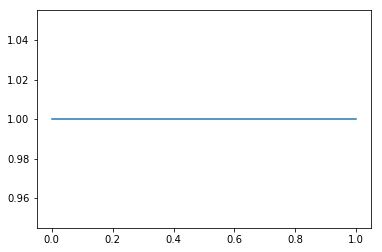

In [22]:
theta = np.linspace (0, 1, samples)
prior = np.ones (samples)
plt.plot (theta, prior)
plt.show ()

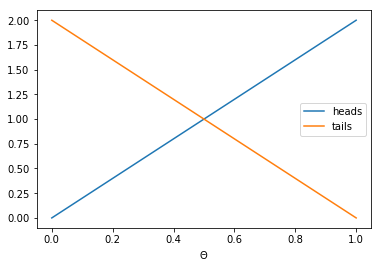

In [30]:
likelihood = np.linspace (0, 2, samples)
plt.plot (theta, likelihood, label='heads')
plt.plot (theta, 2 - likelihood, label='tails')
plt.xlabel ('$\Theta$')
plt.legend ()
plt.show ()

In [33]:
def posterior (prior, likelihood, range=1.0):
    """Compute a properly scaled posterior distribution."""
    post = prior * likelihood
    scale = sum (post) / len (post) / range
    return post / scale

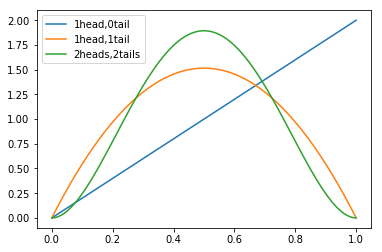

In [43]:
plt.plot (theta, posterior (prior, likelihood), label='1head,0tail')
plt.plot (theta, posterior (prior, likelihood * (2 - likelihood)), label='1head,1tail')
plt.plot (theta, posterior (prior, likelihood**2 * (2 - likelihood)**2), label='2heads,2tails')
plt.legend ()
plt.show ()

## The Model in Action

First cut:  by hand.

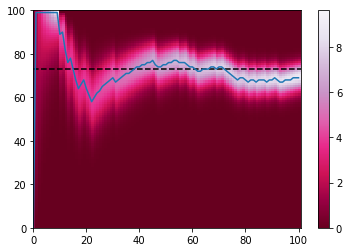

In [54]:
prior = np.ones (samples)
estimates = np.empty (shape=(samples, samples+1), dtype=np.float)
estimates[:,0] = prior
for i, toss in enumerate (tosses):
    if toss:
        prior = posterior (prior, likelihood)
    else:
        prior = posterior (prior, 2 - likelihood)
    estimates[:,i+1] = prior

plt.pcolormesh (estimates)
plt.plot (np.argmax (estimates, 0))
plt.hlines (heads * samples, 0, samples+1, linestyles='--')
plt.set_cmap ('PuRd_r')
plt.colorbar ()
plt.show ()

Second try:  broadcasting.

## Is the Coin Fair?